In [25]:
%matplotlib inline
import os
import geopandas as gpd
import pandas as pd

In [26]:
source_shapefile = os.path.join('data', 'swissBOUNDARIES3D_1_3_TLM_KANTONSGEBIET.shp')
abbreviation_map = 'abbr_map.csv'

In [27]:
def read_shapefile(source_file):
    geo_df = gpd.read_file(source_file, encoding='utf-8')
    geo_df = geo_df.to_crs(epsg=4326)
    return geo_df

In [28]:
# Cantons
abbr_df = pd.read_csv(abbreviation_map, sep=';', encoding='utf-8')
canton_geo_df = read_shapefile(source_shapefile)
df = canton_geo_df.merge(abbr_df, how='left', on='NAME')[['ABBREVIATION', 'NAME','geometry']]
df.to_file("cantons.geojson", driver='GeoJSON',encoding='utf-8')
df.dissolve(by='ABBREVIATION').reset_index().to_file("cantons_dissolved.geojson", driver='GeoJSON',encoding='utf-8')

In [29]:
# Municipalities
muni_geo_df = read_shapefile(os.path.join('data', 'swissBOUNDARIES3D_1_3_TLM_HOHEITSGEBIET.shp'))
muni_geo_df.to_file("municipalities.geojson", driver='GeoJSON',encoding='utf-8')
muni_geo_df.head()

,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,...,REVISION_Q,NAME,KANTONSNUM,ICC,EINWOHNERZ,BFS_NUMMER,GEM_TEIL,GEM_FLAECH,SHN,geometry
0,{D5A9677C-FE38-44F6-B0E8-3177F6252C81},20191031110905,20081124,2000,1,2020,1,Verbessert,swisstopo,2019,...,2019_Aufbau,Scuol,18.0,CH,4591.0,3762,0,43861.0,CH18433762,POLYGON Z ((10.1051599925894 46.84090300722562...
1,{B55F9EAE-EB69-4468-A41C-7BB28A6699EE},20191031110844,20081124,2006,1,2020,1,Verbessert,swisstopo,2019,...,2019_Aufbau,Glarus Süd,8.0,CH,9494.0,1631,0,43003.0,CH08001631,POLYGON Z ((8.914865801900159 46.8111494628354...
2,{AB2BA4A5-EB8C-40C7-A259-271DAC93C767},20191031110845,20081124,2000,1,2020,1,Verbessert,swisstopo,2019,...,2019_Aufbau,Zernez,18.0,CH,1527.0,3746,0,34404.0,CH18433746,POLYGON Z ((10.1051599925894 46.84090300722562...
3,{550D0610-1EE3-4748-8F29-88072753FFDC},20191031110839,20081124,2000,1,2020,1,Verbessert,swisstopo,2019,...,2019_Aufbau,Surses,18.0,CH,2356.0,3543,0,32377.0,CH18413543,POLYGON Z ((9.497122760827237 46.6034363358163...
4,{C9A12E0C-B661-4ED3-B5D2-C604EC55C7A6},20181121144029,20081124,1900,1,2020,1,Verbessert,AV,2019,...,2019_Aufbau,Lac Léman (VD),22.0,CH,NaN,9758,1,29756.0,CH22009758,POLYGON Z ((6.247717596185757 46.3869188545763...


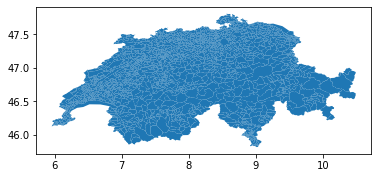

In [30]:
muni_geo_df.plot()